In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
heart_data = pd.read_table('processedWithHeader.cleveland.data', sep=',', na_values=["?"])
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,goal
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
print(heart_data.shape)

(303, 13)


In [3]:
heart_data.dropna(inplace=True)
print(heart_data.shape)

(297, 13)


In [4]:
print(heart_data['age'].unique())

[1. 0.]


In [5]:
print(heart_data.groupby('age').size())

age
0.0     96
1.0    201
dtype: int64


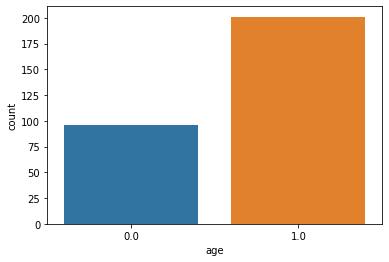

In [6]:
import seaborn as sns
sns.countplot(x = 'age', data = heart_data)
plt.show()

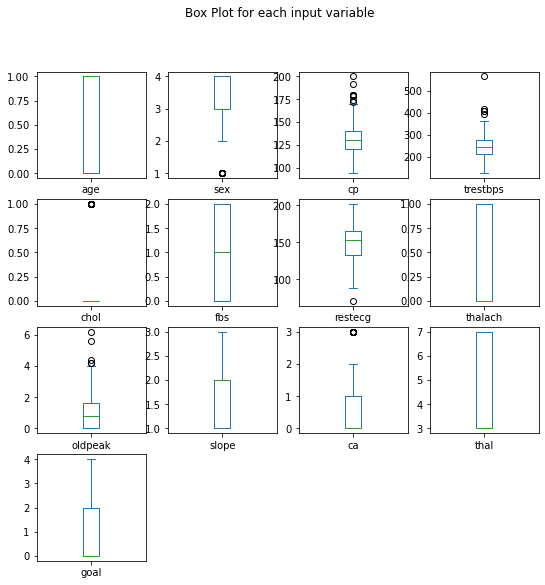

In [7]:
heart_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('heart_data_boxplot')
plt.show()
#clolor score -> nearly Gaussian distribution

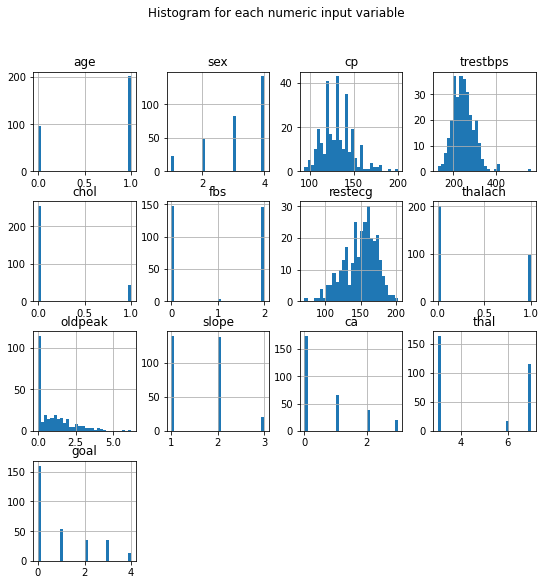

In [8]:
import pylab as pl
heart_data.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('heart_data_hist')
plt.show()

In [9]:
heart_data.head()
# features that are not interesting (not much variance): sex, fbs, exang
# -> drop them, when plotting the scatter_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,goal
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


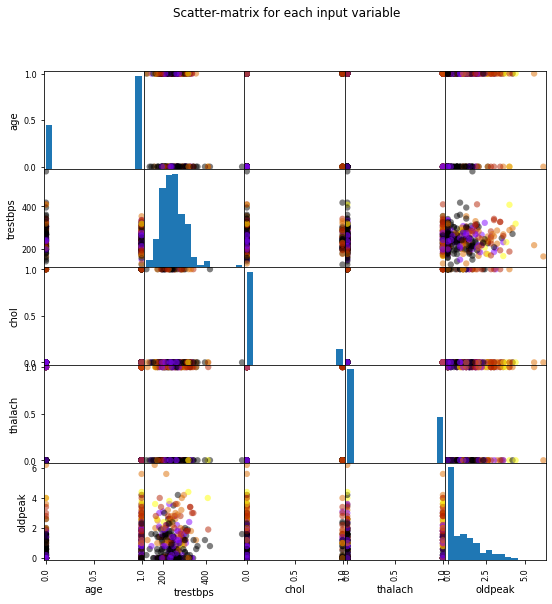

In [10]:
#correlation
from pandas.plotting import scatter_matrix
from matplotlib import cm
#feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
#feature_names = ['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']
feature_names = ['age','trestbps','chol','thalach','oldpeak']
# feature_names = ['age','trestbps','chol','thalach']
X = heart_data[feature_names]
y = heart_data['goal']
#Y Wert immer die Klassifizierung
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('heart_data_scatter_matrix')
#correlation 

In [11]:
#creating a training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.59
Accuracy of Logistic regression classifier on test set: 0.51


In [13]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.45


In [14]:
#k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.51


In [15]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.59
Accuracy of LDA classifier on test set: 0.49


In [16]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.59
Accuracy of GNB classifier on test set: 0.48


In [17]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.61
Accuracy of SVM classifier on test set: 0.47


In [18]:
#confusion matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[36  3  0  0  0]
 [11  2  1  1  0]
 [ 4  2  0  2  0]
 [ 2  5  1  0  0]
 [ 2  0  3  0  0]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.77        39
           1       0.17      0.13      0.15        15
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         5

    accuracy                           0.51        75
   macro avg       0.16      0.21      0.18        75
weighted avg       0.37      0.51      0.43        75



C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
